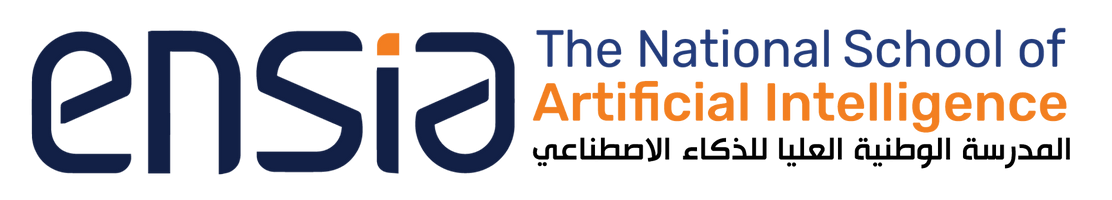

---

## **Project : Stock Market Investment Optimization Application**

---

## Set up

In [49]:
#!pip instal yfinance
import yfinance as yf # install it if needed
import pandas as pd
import numpy as np
from queue import PriorityQueue
import itertools
import matplotlib.pyplot as plt
import random
import re
from functools import reduce
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from datetime import datetime
import os
import pickle
from fetchticker import fetch_tickers


## Ticker Selection

data set creation  
# no need to run it 

In [51]:
 
# #tickers=['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB',
#          'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG',
#          'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV',
#          'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL',
#          'BAC', 'BAX', 'BDX', 'BRK-B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO',
#          'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL',
#          'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB',
#          'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG',
#          'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX',
#          'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY', 'DECK', 'DE', 'DELL', 'DAL', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DG',
#          'DLTR', 'D', 'DPZ', 'DASH', 'DOV', 'DOW', 'DHI', 'DTE', 'DUK', 'DD', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA',
#          'ELV', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ERIE', 'ESS', 'EL', 'EG', 'EVRG', 'ES',
#          'EXC', 'EXE', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE',
#          'FI', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GE', 'GEHC', 'GEV', 'GEN', 'GNRC', 'GD', 'GIS',
#          'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GDDY', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'DOC', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT',
#          'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUBB', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'INCY',
#          'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JBL', 'JKHY',
#          'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KVUE', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KKR', 'KLAC', 'KHC', 'KR',
#          'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LII', 'LLY', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB',
#          'MTB', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD',
#          'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI',
#          'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA',
#          'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PLTR', 'PANW', 'PARA', 'PH', 'PAYX',
#          'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU',
#          'PEG', 'PTC', 'PSA', 'PHM', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'ROK',
#          'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SW', 'SNA', 'SOLV',
#          'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SMCI', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP',
#          'TGT', 'TEL', 'TDY', 'TER', 'TSLA', 'TXN', 'TPL', 'TXT', 'TMO', 'TJX', 'TKO', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL',
#          'TSN', 'USB', 'UBER', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VLTO', 'VRSN', 'VRSK', 'VZ', 'VRTX',
#          'VTRS', 'VICI', 'V', 'VST', 'VMC', 'WRB', 'GWW', 'WAB', 'WBA', 'WMT', 'DIS', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC',
#          'WY', 'WSM', 'WMB', 'WTW', 'WDAY', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZTS']
# # Initialize dictionary to store stock metrics
# stock_data = {}

# # Loop through each ticker and fetch the metrics
# for ticker in tickers:
#     stock = yf.Ticker(ticker)
#     hist = stock.history(period='3y')  # Fetch 3 years of historical data
    
#     if hist.empty:
#         continue
    
#     # 5. Dividend Yield
#     try:
#         dividend_yield = stock.info['dividendYield'] * 100  # Convert to percentage
#     except KeyError:
#         dividend_yield = 0 
    
#     # ROI (Consider removing dividend yield here to avoid double-counting)
#     try:
#         start_price = hist['Close'].iloc[0]
#         end_price = hist['Close'].iloc[-1]
#         if start_price > 0:  # Ensure valid start price
#             roi = (end_price - start_price) / start_price
#         else:
#             roi = np.nan
#     except Exception as e:
#         roi = np.nan
    
#     # 2. Volatility (Standard deviation of daily returns)
#     try:
#         daily_returns = hist['Close'].pct_change().dropna()
#         volatility = daily_returns.std() * np.sqrt(252)  # Annualized volatility
#     except Exception as e:
#         volatility = np.nan
    
#     # 3. PE Ratio
#     try:
#         pe_ratio = stock.info['trailingPE']
#     except KeyError:
#         pe_ratio = np.nan  # If the PE ratio is not available
    
#     # 4. Sharpe Ratio (Assume a risk-free rate of 0 for simplicity)
#     try:
#         avg_return = daily_returns.mean() * 252  # Annualized average return
#         sharpe_ratio = avg_return / volatility if volatility != 0 else np.nan
#     except Exception as e:
#         sharpe_ratio = np.nan
    
#     # Add the metrics to the dictionary
#     stock_data[ticker] = {
#         'roi': roi,
#         'volatility': volatility,
#         'pe_ratio': pe_ratio,
#         'sharpe_ratio': sharpe_ratio,
#         'dividend_yield': dividend_yield
#     }

# # Convert stock data to a DataFrame
# df = pd.DataFrame(stock_data).T  # Transpose to have tickers as rows

# # Save to CSV
# df.to_csv('stock_metrics.csv', index=True)

# print("Stock metrics have been saved to 'stock_metrics.csv'.")


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK-B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY', 'D

In [27]:
from math import ceil


def normalize_metrics(df):
    for column in df.columns:
        if df[column].dtype != 'object':  # Skip non-numeric columns
            df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df

def score_metrics(df, risk_tolerance, horizon):
    # Define weights based on risk tolerance and time horizon
    if risk_tolerance == 'conservative':
        if horizon == 'long':
            weights = {'roi': 0.1, 'volatility': 0.4, 'pe_ratio': 0.0, 'sharpe_ratio': 0.4, 'dividend_yield': 0.1}
        elif horizon == 'short':
            weights = {'roi': 0.35, 'volatility': 0.4, 'pe_ratio': 0.0, 'sharpe_ratio': 0.2, 'dividend_yield': 0.1}
    elif risk_tolerance == 'balanced':
        if horizon == 'long':
            weights = {'roi': 0.2, 'volatility': 0.4, 'pe_ratio': 0.0, 'sharpe_ratio': 0.3, 'dividend_yield': 0.1}
        elif horizon == 'short':
            weights = {'roi': 0.3, 'volatility': 0.3, 'pe_ratio': 0.0, 'sharpe_ratio': 0.2, 'dividend_yield': 0.1}
    elif risk_tolerance == 'aggressive':
        weights = {'roi': 0.5, 'volatility': 0.1, 'pe_ratio': 0.0, 'sharpe_ratio': 0.3, 'dividend_yield': 0.1}
    
    
    # Score calculation with ROI instead of CAGR
    score = (weights['sharpe_ratio'] * df['sharpe_ratio'] +
             weights['roi'] * df['roi'] -
             weights['volatility'] * df['volatility'] +
             # Lower P/E ratio is better
             weights['dividend_yield'] * df['dividend_yield'])

    # Assign the score to the dataframe
    df['score'] = score
    
    # Return the sorted dataframe based on the score
    return df.sort_values(by='score', ascending=False)

def select_stocks (df,n) :
    
    selected=df.index[:n].tolist()
    return selected


def get_tickers( risk_tolerance='conservative', number_of_stocks=5, horizon='long') :
     # Fetch a range of tickers
    metrics_dict=pd.read_csv('stock_metrics.csv',index_col=0)
    metrics_table = pd.DataFrame(metrics_dict)  # Create a DataFrame
    
      
    metrics_table = metrics_table.dropna(axis=0, how='any')   
   
   
    # Normalize the metrics
    metrics_table = normalize_metrics(metrics_table)
    
    
    # Score the metrics based on user preferences
    scored_table = score_metrics(metrics_table, risk_tolerance, horizon)
    scored_table.to_csv('scored.csv', index=True)
    
    # Filter stocks based on available capital and max investment per stock
    selected_stocks = select_stocks(scored_table, number_of_stocks)
    
    print(scored_table.loc[selected_stocks])
    return selected_stocks



In [28]:



# getting info
def get_current_prices(tickerss):
        """
        Fetches real-time stock prices for the given tickers.
        
        Returns:
        dict: A dictionary where keys are tickers and values are their current prices.
        """
        
        prices = {}
        for ticker in tickerss:
            try:
                stock = yf.Ticker(ticker)
                prices[ticker] = stock.info["currentPrice"]                     # Fetch real-time price
            except KeyError:                                                    
                prices[ticker] = stock.history(period="1d")["Close"].iloc[-1]   # Fallback: Use last close price
            except Exception as e:
                print(f"Error fetching stock data: {e}")
                return None
        return prices


def get_stock_data(tickerss, invest_dur):
    """
    Fetches historical stock data and calculates return and risk for each ticker.
        
    Returns:
    pandas.DataFrame: A DataFrame containing 'Return' and 'Risk' values for each stock.
    """
    try:
        periode = "6mo" if invest_dur == "short" else "3y"       
        scalar = 252  # average trading days in a year

        data = yf.download(tickerss, start="2024-06-01", end="2024-12-30", progress=False)
        if data.empty:
            raise ValueError("No data returned for the given tickers.")
        
        adj_close = data['Close']  # shape: (dates, tickers)
        daily_returns = adj_close.pct_change()

        mean_returns = daily_returns.mean() * scalar
        std_devs = daily_returns.std() * (scalar ** 0.5)

        result = pd.DataFrame({"Return": mean_returns, "Risk": std_devs})
        result = result[result["Return"] > 0]
        tickerss = result.index.tolist()
        return result, tickerss
    
    except Exception as e:
        print(f"Error fetching stock data: {e}")
        return None, []


## SEARCH

### 1-Node representation :

In [29]:
class Node:
    """
    Represents a node in the graph tree.

    Attributes:
        state (any): The state of the node.
        parent (Node, optional): The parent node in the search tree.
        action (any, optional): The action taken to reach this node.
        h (float, optional): The heuristic cost (negative for minimization).
    
    Methods:
        __hash__(): Computes a unique hash value for the node's state.
        __lt__(node): Compares nodes based on their heuristic cost.
    """
    
    def __init__(self, state, parent=None, action=None, h=None):  
        """
        Initializes a new node.

        Args:
            state (any): The state of the node.
            parent (Node, optional): The parent node in the search tree.
            action (any, optional): The action taken to reach this node.
            h (float, optional): The heuristic cost (negative for minimization).

        Returns:
            None
        """
        self.state = state
        self.parent = parent
        self.action = action
        self.f = -h  # Stores heuristic as negative for comparison

    def __hash__(self):
        """
        Generates a hash value for the node's state to allow usage in sets and dictionaries.

        Returns:
            int: A hash value representing the node's state.
        """
        if isinstance(self.state, list):
            state_tuple = tuple(tuple(row) if isinstance(row, list) else row for row in self.state)
        else:
            state_tuple = (self.state,)
        return hash(state_tuple)

    def __lt__(self, node):
        """
        Compares two nodes based on their heuristic cost.

        Args:
            node (Node): The other node to compare.

        Returns:
            bool: True if this node has a lower heuristic cost than the other node.
        """
        return self.f < node.f


### 2-Problem formulation

In [46]:
class Investment:
    def __init__(self, tickerss = ["AAPL", "MSFT", "TSLA"] , capital = 10000, max_risk = 0.36 ,
                 max_invest_per_stock = 0.4, invest_dur="short_term", sd=None, ss=None):  
        """
        Initializes the Investment class with stock tickers, capital, risk constraints, and investment duration.
        
        Arguments:
        tickers (list): List of stock symbols.
        capital (float): Total available capital.
        max_risk (float): Maximum allowed portfolio risk.
        max_invest_per_stock (float): Maximum investment allowed per stock.
        invest_dur (str): Investment duration, either 'short_term' or 'long_term'.
        """
        self.tickers = tickerss                                                  # Can put a default (e.g., ["AAPL", "MSFT"])
        self.capital = capital
        self.max_risk = max_risk
        self.max_invest_per_stock = max_invest_per_stock
        self.invest_dur = invest_dur   
        
        self.stock_data = sd
        self.step_sizes = ss
        self.initial = Node(state=[self.capital, [0] * len(self.tickers), 0, 0 ] , h = self.heuristic([0] * len(self.tickers))) 
            # [remaining_capital, allocations, total_return, portfolio_risk]
              
    # ROI & risk expectation
    def heuristic(self, weights):
        """ ℎ ( 𝑤 ) = − max_((∑_𝑖 investment_𝑖 × Return_𝑖)) """
        total_invested = sum(weights)
        remaining_capital = self.capital - total_invested
    
        if remaining_capital <= 0:
            return 0
    
        # Build a list of stocks with (Return/Risk, Return, Risk, index)
        candidates = []
        for i, ticker in enumerate(self.tickers):
            stock_return = self.stock_data["Return"].iloc[i]
            stock_risk = self.stock_data["Risk"].iloc[i]
            ratio = stock_return / (stock_risk + 1e-6)  # avoid division by zero
            candidates.append((ratio, stock_return, stock_risk, i))
    
        # Sort stocks by highest Return-to-Risk ratio
        candidates.sort(reverse=True)
    
        est_total_return = 0
        est_total_risked = 0
        est_total_invested = total_invested

        # Simulate greedy investing into best stocks
        for ratio, stock_return, stock_risk, idx in candidates:
            max_possible_invest = min(remaining_capital, self.max_invest_per_stock * self.capital - weights[idx])

            if max_possible_invest <= 0:
                continue

            # Check new risk if we invest this
            new_total_invested = est_total_invested + max_possible_invest
            new_risk = ( sum(weights[j] * self.stock_data["Risk"].iloc[j] for j in range(len(weights)))
                        + est_total_risked + max_possible_invest * stock_risk ) / new_total_invested

            est_total_return += max_possible_invest * stock_return
            est_total_risked += max_possible_invest * stock_risk
            est_total_invested = new_total_invested
            remaining_capital -= max_possible_invest

            if remaining_capital <= 0:
                break
    
        if est_total_return == 0:
            return float('-inf')
    
        # Return the negative (because you minimize heuristic in A*)
        return -est_total_return

    def cost(self, weights):
        """ 
        Improved cost function: maximize ROI while penalizing risk.
        """
        total_invested = sum(weights)
        if total_invested == 0:
            return 0  # No investment → zero cost
    
        roi = sum(
            weights[i] * self.stock_data["Return"].iloc[i]
            for i in range(len(weights))
        )
        risk = sum(
            weights[i] * self.stock_data["Risk"].iloc[i]
            for i in range(len(weights))
        ) / total_invested
    
        # λ controls how much we care about risk
        lambda_ = 0

        return (roi + lambda_ * risk)

    # Check constraints
    def meets_constraints(self, weights):
        """
        Checks if a given portfolio meets investment constraints.

        Arguments:
        weights (list): List of investment weights for each stock.

        Returns:
        tuple: (bool, list) A boolean indicating constraint satisfaction and messages if rejected.
        """
        msg = []
        total_invested = sum(weights)
        portfolio_risk = sum(weights[i] * self.stock_data["Risk"].iloc[i] for i in range(len(weights))) / total_invested if total_invested!=0 else 0
        max_investment = max(weights) / total_invested if total_invested!=0 else 0
        if portfolio_risk > self.max_risk:
            msg.append(f"Rejected: Portfolio risk {portfolio_risk} exceeds max allowed {self.max_risk}")

        if max_investment > self.max_invest_per_stock:
            msg.append(f"Rejected: Max single stock investment {max_investment} exceeds allowed {self.max_invest_per_stock}")

        if total_invested > self.capital:
            msg.append(f"Rejected: Total investment {total_invested} exceeds capital {self.capital}")

        return portfolio_risk <= self.max_risk and max_investment <= self.max_invest_per_stock and total_invested <= self.capital  , msg

    # Test if a goal
    def is_goal(self, node):
        """
        Checks if the investment goal is reached.

        Arguments:
        node (Node): Current state of investment.

        Returns:
        bool: True if investment goal is met, otherwise False.
        """
        total_invested = sum(node.state[1])
        return total_invested >= self.capital * 0.99 and self.meets_constraints(node.state[1])

    # Valid actions
    def actions(self, node):
        """
        Generates valid actions (investment allocations) from the current state.

        Arguments:
        node (Node): Current state of investment.

        Returns:
        tuple: (list, list) A list of valid actions and messages if constraints are violated.
        """
        msg = []
        valid_actions = []
        current_weights = node.state[1]
        
        for i in range(len(self.tickers)):
            new_weights = current_weights[:]
            new_weights[i] += self.step_sizes[self.tickers[i]]
            met , msg = self.meets_constraints(new_weights)
            if met :
                valid_actions.append(new_weights)

        for k in range(2, len(self.tickers) + 1):
            for combo in itertools.combinations(range(len(self.tickers)), k):
                new_weights = current_weights[:]
                for i in combo:
                    new_weights[i] += self.step_sizes[self.tickers[i]]
                met , msg = self.meets_constraints(new_weights)
                if met:
                    valid_actions.append(new_weights)

        return valid_actions , msg

    #random selection of successor
    def random_successor(self, node):
        """
        Selects a random valid successor state.

        Arguments:
        node (Node): Current state of investment.

        Returns:
        Node: A randomly selected successor state or constraint violation messages.
        """
        neighbors = []
        actins , msg = self.actions(node)
        for act in actins:
            child = self.expand_node(node, act , g = False)
            neighbors.append(child)
        
        rnd_idx = random.randint(0, len(neighbors) - 1)  if  len(neighbors) > 0 else None
        return neighbors[rnd_idx] if rnd_idx is not None else msg
        
        
    # Expand a node
    def expand_node(self, node, action , g = False):
        """
        Expands a node to generate a new investment state.

        Arguments:
        node (Node): The current node.
        action (list): Investment allocation.
        cost (bool): Whether to include cost adjustments.

        Returns:
        Node: The expanded investment state.          ((node.state[0] - (self.capital-sum(action)) ) / node.state[0])
        """
        if action is None:
            return None
        h = self.heuristic(action) +  self.cost(action) if g else self.heuristic(action)
        return Node(state=[self.capital-sum(action), action, sum(w * self.stock_data["Return"].iloc[i] for i, w in enumerate(action)) ,
                    sum(w * problem.stock_data["Risk"].iloc[i] for i, w in enumerate(action)) / sum(action) ],
                    parent = node, action = [a - b for a, b in zip(action, node.state[1])],  h = h)


### 3-Best First Graph Search

In [31]:
def best_first_graph_search(problem , g):
    """
        Performs a greedy best-first .
    """
    if problem.stock_data is None or problem.stock_data.empty:
        print("Invalid stock data.")
        return None, 0, 0
    
    frontier = PriorityQueue()
    explored = set()
    frontier_dict = {}                                                  # Track f-values for fast updates
    
    frontier.put((problem.initial.f, problem.initial))
    explored.add(hash(problem.initial))
    frontier_dict[hash(problem.initial)] = problem.initial.f
    
    while not frontier.empty():
        node = frontier.get()[1]
        explored.add(hash(node))
        frontier_dict.pop(hash(node), None)
        
        if problem.is_goal(node):
            return node
            
        if problem.actions(node) is None:
            continue
        actins , msg = problem.actions(node)
        for act in actins:
            child = problem.expand_node(node, act , g = g)   # the cost = False to exclude g i.e ( f = h )
            if hash(child) in explored:
                continue
            if hash(child) not in frontier_dict or child.f < frontier_dict[hash(child)]:
                frontier.put((child.f, child))
                frontier_dict[hash(child)] = child.f

    if len(msg) > 0 :
        print(msg)
        return None
    if not g :   
        print("No optimal solution found within iteration limit.")
        best_node = max(explored, key=lambda s: node.f)
        return best_node
    return None
    

#### 3.1-Greedy Search

In [32]:
def Greedy_search(problem):
    """
        Performs a Greedy_search search.
    """
    return best_first_graph_search(problem , g = False)

#### 3.2-A* Search

In [33]:
def A_star(problem):
    """
        Performs a A* best-first search.
    """
    return best_first_graph_search(problem , g = True)

### 4-Simulated Annealing

In [34]:
def Simulated_Annealing(problem , T = 1000 , alpha = 0.1 , equation = "linear"):
    """
    Simulated Annealing algorithm.
    
    Arguments:
    problem -- The optimization problem to solve.
    T (float) -- Initial temperature (default: 1000).
    alpha (float) -- Cooling rate (default: 0.1).
    equation (str) -- Cooling schedule type: 'linear' or 'exponential' (default: 'linear').
    
    Returns:
    Node -- The best-found solution.
    """
    def schedule(t):
        """
        Computes the temperature based on the chosen cooling schedule.
        
        Arguments:
        t (int) -- Current iteration step.
        
        Returns:
        float -- Updated temperature value.
        """
        return T - alpha * t if equation == "linear " else T * ( alpha ** t )
        
    current = problem.initial
    
    for t in itertools.count(1):
        T = schedule(t)

        if T == 0 : 
            return current
            
        neighbor = problem.random_successor(current)
        if not isinstance(neighbor, Node): # no more valid
            return current
        E = neighbor.f - current.f
        
        if E < 0 or random.random() < np.exp(-E / T):
            current = neighbor


### 5-Utilities

In [35]:
# for setting up the tickers 
def set_tickers():
    infos = fetch_fundamentals(tickers)
    scored_df = score_stocks(infos, profile_name)
    top_stocks = scored_df.head(top_n).index.tolist()
    return top_stocks



# for plotting the wiehgts
def plot(problem, node , color = "#707070"):
    if not isinstance(node,Node) :
        return 
    print("Portfolio Allocation:")
    for ticker, amount in zip(problem.tickers, node.state[1]):
        print(f"{ticker}: ${amount}")
    print(f"Expected Return: ${node.state[2]:.2f}")
    print(f"Portfolio Risk (Volatility): {node.state[3]:.2%}")
    
    plt.figure(figsize=(10, 6))
    plt.bar(problem.tickers, node.state[1], width=0.4, color= color )
    
    plt.xlabel("Stock")
    plt.ylabel("Investment ($)")
    plt.title("Portfolio Allocation")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    for i, val in enumerate(node.state[1]):
        plt.text(i, val + 100, f"${val:.2f}", ha="center", fontsize=10)
    
    plt.show()


## CSP

### 1-CSP

In [36]:
class CSP:
    """Constraint Satisfaction Problem for portfolio optimization with max ROI."""
    def __init__(self, variables, domains, neighbors):
        self.variables = variables or list(domains.keys())
        self.domains = domains
        self.neighbors = neighbors
        self.curr_domains = None
        self.nassigns = 0

    def assign(self, var, val, assignment):
        """Assign a value to a variable."""
        assignment[var] = val
        self.nassigns += 1

    def unassign(self, var, assignment):
        """Remove a variable's assignment."""
        if var in assignment:
            del assignment[var]

    def nconflicts(self, var, val, assignment):
        """Count conflicts for a variable-value pair."""
        def conflict(var2):
            return var2 in assignment and not self.constraints(assignment, var, val, var2, assignment[var2])
        return sum(conflict(v) for v in self.neighbors[var])

    def constraints(self, assignment, var, val, var2=None, val2=None):
        """Check if an assignment satisfies constraints."""
        new_assign = assignment.copy()
        new_assign[var] = val

        total_invested = sum(new_assign.values())

        # Reject partial assignments exceeding capital
        if total_invested > capital:
            return False

        # For partial assignments, no further checks
        if len(new_assign) < len(self.variables):
            return True

        # For complete assignments, check all constraints
        portfolio_risk = sum(
            new_assign[ticker] * stock_data["Risk"].loc[ticker]
            for ticker in new_assign
        ) / total_invested if total_invested > 0 else 0

        max_investment = max(new_assign.values()) / total_invested if total_invested > 0 else 0

        return (0.95 * capital <= total_invested <= capital and
                portfolio_risk <= max_risk and
                max_investment <= max_invest_per_stock)

    def support_pruning(self):
        """Initialize current domains for pruning."""
        if self.curr_domains is None:
            self.curr_domains = {v: list(self.domains[v]) for v in self.variables}

    def suppose(self, var, val):
        """Temporarily assign a value and track removals."""
        self.support_pruning()
        removals = [(var, a) for a in self.curr_domains[var] if a != val]
        self.curr_domains[var] = [val]
        return removals

    def prune(self, var, val, removals):
        """Remove a value from a variable's domain."""
        self.curr_domains[var].remove(val)
        if removals is not None:
            removals.append((var, val))

    def choices(self, var):
        """Get available values for a variable."""
        return (self.curr_domains or self.domains)[var]

    def infer_assignment(self):
        """Infer assignments from singleton domains."""
        self.support_pruning()
        return {v: self.curr_domains[v][0] for v in self.variables if 1 == len(self.curr_domains[v])}

    def restore(self, removals):
        """Restore pruned values."""
        for B, b in removals:
            self.curr_domains[B].append(b)

    def conflicted_var(self, current):
        """Return variables in conflict."""
        return [var for var in self.variables if self.nconflicts(var, current[var], current) > 0]

    def goal_test(self, state):
        """Check if a complete assignment satisfies constraints and update best ROI."""
        global best_solution, best_roi
        assignment = dict(state)
        if len(assignment) != len(self.variables):
            return False

        total_invested = sum(assignment.values())
        if not (0.95 * capital <= total_invested <= capital):
            return False

        portfolio_risk = sum(
            assignment[ticker] * stock_data["Risk"].loc[ticker]
            for ticker in assignment
        ) / total_invested

        max_investment = max(assignment.values()) / total_invested

        if portfolio_risk <= max_risk and max_investment <= max_invest_per_stock:
            roi = sum(assignment[ticker] * stock_data["Return"].loc[ticker] for ticker in assignment)
            if roi > best_roi:
                best_roi = roi
                best_solution = assignment.copy()
            return True
        return False

        return t

### 2-Backtracking

In [37]:
# for select_unassigned_variable
def mrv(csp, assignment, stock_data):
    """Minimum Remaining Values heuristic, prioritizing high-return stocks."""
    unassigned_variables = [v for v in csp.variables if v not in assignment]
    if not unassigned_variables:
        return None
    scored_vars = {
        var: stock_data["Return"].loc[var]  # Prioritize high-return stocks
        for var in unassigned_variables
    }
    return max(scored_vars, key=scored_vars.get)

def lcv(csp, var, assignment):
    """Least Constraining Value heuristic."""
    return sorted(csp.choices(var), key=lambda val: csp.nconflicts(var, val, assignment))

def forward_checking(csp, var, val, assignment, removals):
    """Perform forward checking to prune domains."""
    csp.support_pruning()
    for B in csp.neighbors[var]:
        if B not in assignment:
            for b in csp.curr_domains[B][:]:
                new_assign = assignment.copy()
                new_assign[var] = val
                new_assign[B] = b
                if not csp.constraints(new_assign, var, val):
                    csp.prune(B, b, removals)
                if not csp.curr_domains[B]:
                    return False
    return True


def Backtracking_search(csp, select_unassigned_variable=mrv, order_domain_values=lcv, 
                        inference=forward_checking, stock_data=None, step_sizes=None, 
                        max_depth=None, max_time=None):
    """Backtracking search to maximize ROI with optional depth and time limits."""
    global best_solution, best_roi
    best_solution = None
    best_roi = float('-inf')
    start_time = time.time()

    def backtrack(assignment, depth=0):
        # Time-based exit
        if max_time is not None and (time.time() - start_time) > max_time:
            return
        
        # Depth-based exit
        if max_depth is not None and depth > max_depth:
            return

        if len(assignment) == len(csp.variables):
            csp.goal_test(assignment.items())
            return
        var = select_unassigned_variable(csp, assignment, stock_data)
        for val in order_domain_values(csp, var, assignment):
            if csp.nconflicts(var, val, assignment) == 0:
                csp.assign(var, val, assignment)
                removals = csp.suppose(var, val)
                if inference(csp, var, val, assignment, removals):
                    backtrack(assignment, depth + 1)
                csp.restore(removals)
                csp.unassign(var, assignment)

    backtrack({})
    return best_solution


### 3-Local

In [38]:
def min_conflicted_value(csp, var, current):
    """Select the value with minimum conflicts, maximizing ROI."""
    zero_conflict_vals = [
        val for val in csp.choices(var) if csp.nconflicts(var, val, current) == 0
    ]

    if not zero_conflict_vals:
        return min(csp.choices(var), key=lambda val: csp.nconflicts(var, val, current))

    best_val = None
    best_score = float('-inf')

    for val in zero_conflict_vals:
        new_assignment = current.copy()
        new_assignment[var] = val
        total_invested = sum(new_assignment.values())
        if total_invested == 0:
            continue
        roi = sum(new_assignment[ticker] * stock_data["Return"].loc[ticker] for ticker in new_assignment)
        risk = sum(new_assignment[ticker] * stock_data["Risk"].loc[ticker] for ticker in new_assignment) / total_invested
        score = roi - 0.1 * risk  # Heavily prioritize ROI
        if score > best_score:
            best_score = score
            best_val = val

    return best_val if best_val is not None else random.choice(zero_conflict_vals)

def eval(current, fallback):
    """Compare two assignments based on ROI and constraints."""
    if not csp.goal_test(current.items()):
        return False
    if not csp.goal_test(fallback.items()):
        return True
    roi_C = sum(current[ticker] * stock_data["Return"].loc[ticker] for ticker in current)
    roi_F = sum(fallback[ticker] * stock_data["Return"].loc[ticker] for ticker in fallback)
    return roi_C > roi_F

def min_conflicts(csp, max_steps=1000):
    """Min-conflicts local search to maximize ROI."""
    global best_solution, best_roi
    best_solution = None
    best_roi = float('-inf')

    # Run multiple iterations with different initial assignments
    for _ in range(5):  # Try 5 different starting points
        current = {ticker: min(csp.domains[ticker], key=lambda x: abs(x - capital/3)) for ticker in csp.variables}
        fallback = None

        for i in range(max_steps):
            conflicted = csp.conflicted_var(current)
            if csp.goal_test(current.items()):
                roi = sum(current[ticker] * stock_data["Return"].loc[ticker] for ticker in current)
                if roi > best_roi:
                    best_roi = roi
                    best_solution = current.copy()
                break
            var = random.choice(conflicted) if conflicted else random.choice(list(current.keys()))
            val = min_conflicted_value(csp, var, current)
            csp.assign(var, val, current)
            if fallback is None or eval(current, fallback):
                fallback = current.copy()

        if fallback and csp.goal_test(fallback.items()):
            roi = sum(fallback[ticker] * stock_data["Return"].loc[ticker] for ticker in fallback)
            if roi > best_roi:
                best_roi = roi
                best_solution = fallback.copy()

    return best_solution

### 4-utils

In [39]:
def plott(invest, color="#707070", title="Portfolio Allocation"):
    """Plot portfolio allocation with a summary table."""
    if invest is None:
        print("No valid portfolio to plot.")
        return

    expected_return, portfolio_risk = estimated_roi_risk(invest)
    invest = dict(sorted(invest.items()))
    tickers = list(invest.keys())
    amounts = list(invest.values())
    total = sum(amounts)

    # Print summary table
    print("\n" + "="*60)
    print(f"{title}")
    print("="*60)
    print(f"{'Ticker':<10} {'Amount ($)':<15} {'Percentage':<15} {'Return':<15}")
    print("-"*60)
    for ticker, amount in invest.items():
        percentage = (amount / total) * 100
        return_contrib = amount * stock_data["Return"].loc[ticker]
        print(f"{ticker:<10} ${amount:<14.2f} {percentage:<14.2f}% {return_contrib:<14.2f}")
    print("-"*60)
    print(f"Total Invested: ${total:.2f}")
    print(f"Expected Return: ${expected_return:.2f}")
    print(f"Portfolio Risk (Volatility): {portfolio_risk:.2%}")
    print("="*60 + "\n")

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(tickers, amounts, width=0.4, color=color)
    plt.xlabel("Stocks")
    plt.ylabel("Investment ($)")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Add value labels on bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f"${yval:.2f}", ha="center", fontsize=10)

    plt.tight_layout()
    plt.savefig(f"{title.replace(' ', '_').lower()}.png")
    plt.show()

def estimated_roi_risk(weights):
    """Calculate expected return and risk of a portfolio."""
    total_invested = sum(weights.values())
    roi = sum(weights[ticker] * stock_data["Return"].loc[ticker] for ticker in weights)
    risk = sum(weights[ticker] * stock_data["Risk"].loc[ticker] for ticker in weights) / total_invested
    return roi, risk
           
def get_domain():
    """Generate domains for each ticker based on step sizes."""
    domain = {}
    for t in tickerss:
        domain[t] = []
        step = step_sizes[t]
        while step <= capital:
            domain[t].append(step)
            step += step_sizes[t]
    return domain

def get_neighbors():
    """Generate neighbors for each ticker."""
    neighbors = {}
    for ticker in tickerss:
        neighbors[ticker] = [t for t in tickerss if t != ticker]
    return neighbors


---

## Test search

          roi  volatility  pe_ratio  sharpe_ratio  dividend_yield     score
CAH  0.158388    0.084458  0.002155      0.896997        0.135163  0.354371
GE   0.281931    0.183188  0.003493      0.980785        0.070122  0.354244
BSX  0.147659    0.070885  0.008655      0.887675        0.000000  0.341482
TJX  0.130280    0.062209  0.003012      0.839842        0.134146  0.337496
RSG  0.105753    0.017465  0.003950      0.811370        0.093496  0.337487
['BSX', 'CAH', 'GE', 'RSG', 'TJX']
          Return      Risk
Ticker                    
BSX     0.334203  0.166383
CAH     0.355019  0.214447
GE      0.149210  0.314469
RSG     0.181622  0.162533
TJX     0.308513  0.168442
-------------------------------------------------------------------------------------------------------------------------------------------
Portfolio Allocation:
BSX: $1234.3199999999997
CAH: $1778.64
GE: $2579.52
RSG: $2982.9599999999996
TJX: $1409.0999999999997
Expected Return: $2405.35
Portfolio Risk (Volatility): 2

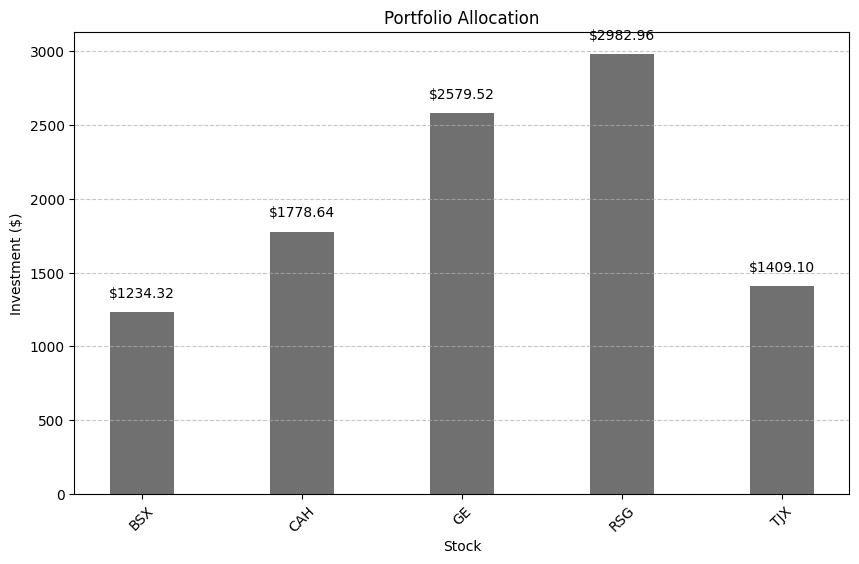

-------------------------------------------------------------------------------------------------------------------------------------------
Portfolio Allocation:
BSX: $1234.3199999999997
CAH: $1778.64
GE: $2579.52
RSG: $2982.9599999999996
TJX: $1409.0999999999997
Expected Return: $2405.35
Portfolio Risk (Volatility): 21.23%


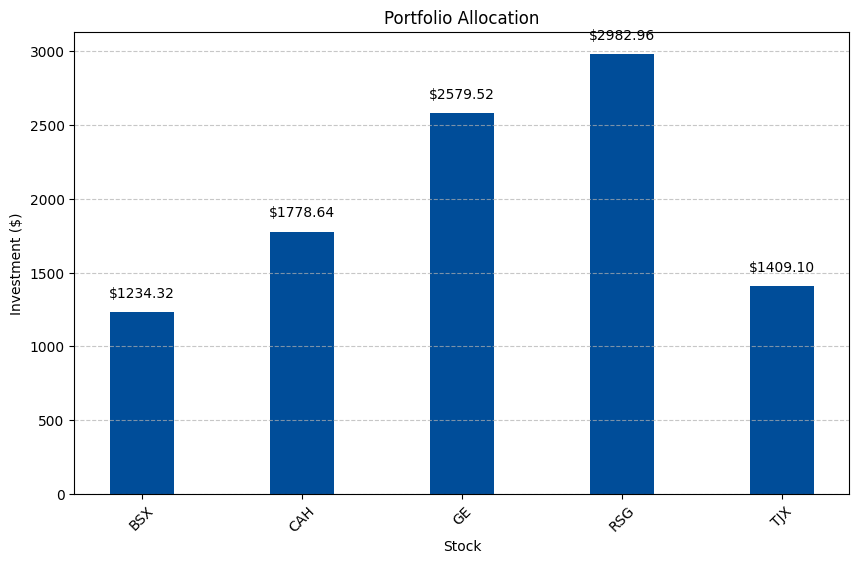

-------------------------------------------------------------------------------------------------------------------------------------------
Portfolio Allocation:
BSX: $1234.3199999999997
CAH: $2223.2999999999997
GE: $2364.56
RSG: $2237.22
TJX: $1921.4999999999993
Expected Return: $2553.78
Portfolio Risk (Volatility): 21.17%


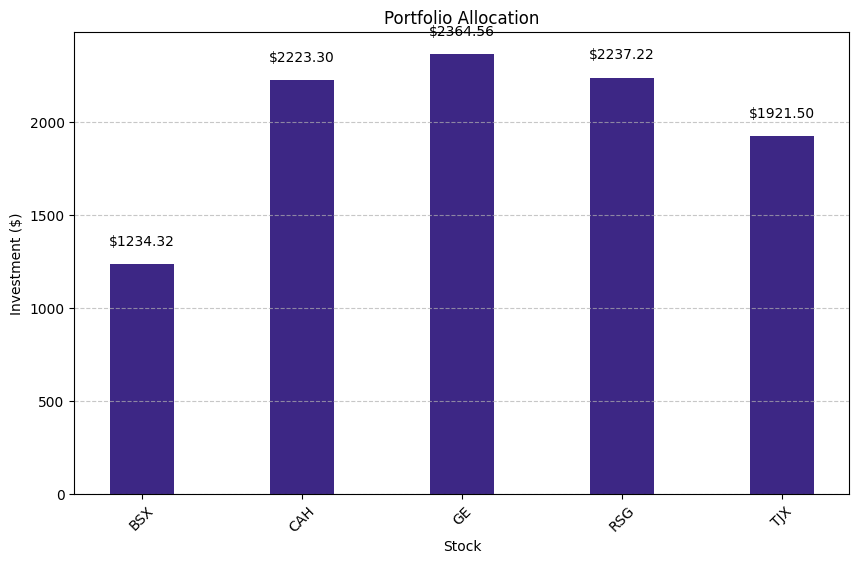


Timing Summary:
Step                                       Wall Time (s)    CPU Time (s)
----------------------------------------------------------------------
Set Tickers                                       0.0180          0.0156
Get Stock Data                                    0.1287          0.0938
Get Current Prices                               12.8719          0.0156
Initialize Investment Problem                     0.0010          0.0000
Greedy Search & Plot                              0.2453          0.2344
A* Search & Plot                                  0.2809          0.2812
Simulated Annealing & Plot                        0.2811          0.2812


In [47]:
import time
if __name__ == "__main__":
    timings = {}
    invest_duration = "long"
    risk_tolerance="conservative"
    risk={
        "aggressive":0.8,
        "balanced":0.55,
        "conservative":0.3
    }
    n_stocks=5 #max 10
    capital = 10000
    max_risk = risk[risk_tolerance]
    max_per_stock = 0.5
    # Part 1: Set tickers
    start_wall = time.time()
    start_cpu = time.process_time()
    tickerss = get_tickers(risk_tolerance=risk_tolerance,number_of_stocks=n_stocks, horizon=invest_duration)
    timings["Set Tickers"] = (time.time() - start_wall, time.process_time() - start_cpu)

    # Initialize parameters
   
    

    # Part 2: Get stock data
    start_wall = time.time()
    start_cpu = time.process_time()
    stock_data, tickerss = get_stock_data(tickerss, invest_duration)
    timings["Get Stock Data"] = (time.time() - start_wall, time.process_time() - start_cpu)

    # Part 3: Get current prices
    start_wall = time.time()
    start_cpu = time.process_time()
    step_sizes = get_current_prices(tickerss)
    timings["Get Current Prices"] = (time.time() - start_wall, time.process_time() - start_cpu)

    print(tickerss)
    print(stock_data)

    # Part 4: Initialize Investment problem
    start_wall = time.time()
    start_cpu = time.process_time()
    problem = Investment(tickerss, capital, max_risk, max_per_stock, invest_duration, stock_data, step_sizes)
    timings["Initialize Investment Problem"] = (time.time() - start_wall, time.process_time() - start_cpu)

    print("-------------------------------------------------------------------------------------------------------------------------------------------")

    # Part 5: Greedy search
    start_wall = time.time()
    start_cpu = time.process_time()
    gold1 = Greedy_search(problem)
    plot(problem, gold1, color="#707070")
    timings["Greedy Search & Plot"] = (time.time() - start_wall, time.process_time() - start_cpu)
    print("-------------------------------------------------------------------------------------------------------------------------------------------")

    # Part 6: A* search
    start_wall = time.time()
    start_cpu = time.process_time()
    gold2 = A_star(problem)
    plot(problem, gold2, color="#004D99")
    timings["A* Search & Plot"] = (time.time() - start_wall, time.process_time() - start_cpu)
    print("-------------------------------------------------------------------------------------------------------------------------------------------")

    # Part 7: Simulated Annealing
    start_wall = time.time()
    start_cpu = time.process_time()
    gold3 = Simulated_Annealing(problem, T=100000, alpha=0.1, equation="linear")
    plot(problem, gold3, color="#3D2785")
    timings["Simulated Annealing & Plot"] = (time.time() - start_wall, time.process_time() - start_cpu)

    # Final Timing Table
    print("\nTiming Summary:")
    print(f"{'Step':<40} {'Wall Time (s)':>15} {'CPU Time (s)':>15}")
    print("-" * 70)
    for step, (wall, cpu) in timings.items():
        print(f"{step:<40} {wall:>15.4f} {cpu:>15.4f}")



## Test csp

          roi  volatility  pe_ratio  sharpe_ratio  dividend_yield     score
CAH  0.158388    0.084458  0.002155      0.896997        0.135163  0.354371
GE   0.281931    0.183188  0.003493      0.980785        0.070122  0.354244
BSX  0.147659    0.070885  0.008655      0.887675        0.000000  0.341482
TJX  0.130280    0.062209  0.003012      0.839842        0.134146  0.337496
RSG  0.105753    0.017465  0.003950      0.811370        0.093496  0.337487
Portfolio Optimization Results (Maximizing ROI)

Running Backtracking Search...
Backtracking Result: {'CAH': 148.22, 'BSX': 2262.919999999999, 'TJX': 4867.8, 'RSG': 2485.7999999999997, 'GE': 214.96}

Portfolio Allocation (Backtracking Search)
Ticker     Amount ($)      Percentage      Return         
------------------------------------------------------------
BSX        $2262.92        22.68         % 756.27        
CAH        $148.22         1.49          % 52.62         
GE         $214.96         2.15          % 32.07         
RSG    

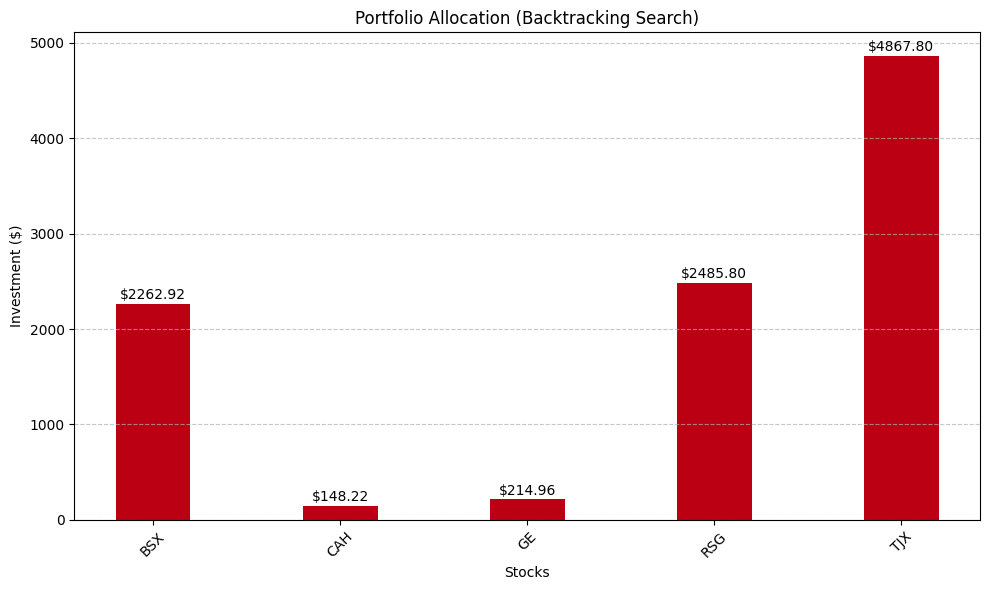


Running Min-Conflicts Search...
Min-Conflicts Result: {'BSX': 3291.5200000000004, 'CAH': 2816.179999999999, 'GE': 214.96, 'RSG': 248.58, 'TJX': 3330.5999999999985}

Portfolio Allocation (Min-Conflicts Search)
Ticker     Amount ($)      Percentage      Return         
------------------------------------------------------------
BSX        $3291.52        33.24         % 1100.04       
CAH        $2816.18        28.44         % 999.80        
GE         $214.96         2.17          % 32.07         
RSG        $248.58         2.51          % 45.15         
TJX        $3330.60        33.64         % 1027.53       
------------------------------------------------------------
Total Invested: $9901.84
Expected Return: $3204.59
Portfolio Risk (Volatility): 18.39%



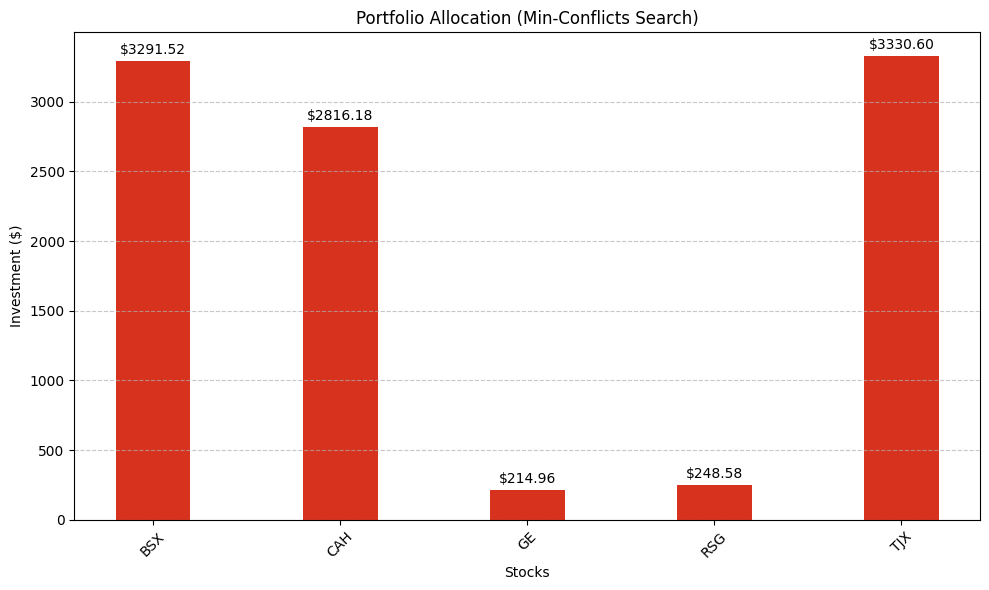


Timing Summary:
Step                                  Wall Time (s)    CPU Time (s)
-----------------------------------------------------------------
Set Tickers                                  0.0179          0.0156
Get Stock Data                               0.0840          0.1094
Get Current Prices                          30.2479          0.0938
Initialize CSP                               0.0000          0.0000
Backtracking Search                         30.0367         30.0312
Min-Conflicts Search                        14.8264         14.8281


In [41]:
if __name__ == "__main__":
    timings = {}
    invest_duration = "long"
    risk_tolerance="conservative"
    risk={
        "aggressive":0.8,
        "balanced":0.6,
        "conservative":0.35
    }
    n_stocks=5 #max 10
    capital = 10000
    max_risk = risk[risk_tolerance]
    max_invest_per_stock = 0.5
    # Part 1: Setup tickers
    start_wall = time.time()
    start_cpu = time.process_time()
    tickerss = get_tickers(risk_tolerance=risk_tolerance,number_of_stocks=n_stocks, horizon= invest_duration)
    timings["Set Tickers"] = (time.time() - start_wall, time.process_time() - start_cpu)

    # Part 2: Parameters & stock data
    
    

    start_wall = time.time()
    start_cpu = time.process_time()
    stock_data, tickerss = get_stock_data(tickerss, invest_duration)
    timings["Get Stock Data"] = (time.time() - start_wall, time.process_time() - start_cpu)

    start_wall = time.time()
    start_cpu = time.process_time()
    step_sizes = get_current_prices(tickerss)
    timings["Get Current Prices"] = (time.time() - start_wall, time.process_time() - start_cpu)

    # Part 3: CSP setup
    start_wall = time.time()
    start_cpu = time.process_time()
    domain = get_domain()
    neighbors = get_neighbors()
    csp = CSP(tickerss, domain, neighbors)
    timings["Initialize CSP"] = (time.time() - start_wall, time.process_time() - start_cpu)

    print("==========================================================================================")
    print("Portfolio Optimization Results (Maximizing ROI)")
    print("==========================================================================================")

    # Part 4: Backtracking Search_
    print("\nRunning Backtracking Search...")
    start_wall = time.time()
    start_cpu = time.process_time()
    invest1 = Backtracking_search(csp, stock_data=stock_data, step_sizes=step_sizes,max_depth=100, max_time=30)
    timings["Backtracking Search"] = (time.time() - start_wall, time.process_time() - start_cpu)
    print(f"Backtracking Result: {invest1}")
    plott(invest1, color="#ba0012", title="Portfolio Allocation (Backtracking Search)")

    print("==========================================================================================")

    # Part 5: Min-Conflicts Search
    print("\nRunning Min-Conflicts Search...")
    start_wall = time.time()
    start_cpu = time.process_time()
    invest2 = min_conflicts(csp)
    timings["Min-Conflicts Search"] = (time.time() - start_wall, time.process_time() - start_cpu)
    print(f"Min-Conflicts Result: {invest2}")
    plott(invest2, color="#d7321e", title="Portfolio Allocation (Min-Conflicts Search)")

    # Final Timing Table
    print("\nTiming Summary:")
    print(f"{'Step':<35} {'Wall Time (s)':>15} {'CPU Time (s)':>15}")
    print("-" * 65)
    for step, (wall, cpu) in timings.items():
        print(f"{step:<35} {wall:>15.4f} {cpu:>15.4f}")
